In [1]:
# from llm_trainer import create_dataset

# create_dataset(save_dir="data",
#                dataset="fineweb-edu-10B",
#                chunks_limit=1500,
#                chunk_size=int(1e6))

In [2]:
import random
import torch
from omegaconf import OmegaConf
from dacite import from_dict
from dacite import Config as DaciteConfig
from xlstm import xLSTMLMModel, xLSTMLMModelConfig
import numpy as np


def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

set_seed(42)

# Create a model
cfg = OmegaConf.load("xlstm_config.yaml")
cfg = from_dict(data_class=xLSTMLMModelConfig, data=OmegaConf.to_container(cfg), config=DaciteConfig(strict=True))
xLSTM = xLSTMLMModel(cfg)

{'verbose': True, 'with_cuda': True, 'extra_ldflags': ['-L/home/nick/anaconda3/envs/xlstm/lib', '-lcublas'], 'extra_cflags': ['-DSLSTM_HIDDEN_SIZE=768', '-DSLSTM_BATCH_SIZE=8', '-DSLSTM_NUM_HEADS=4', '-DSLSTM_NUM_STATES=4', '-DSLSTM_DTYPE_B=float', '-DSLSTM_DTYPE_R=__nv_bfloat16', '-DSLSTM_DTYPE_W=__nv_bfloat16', '-DSLSTM_DTYPE_G=__nv_bfloat16', '-DSLSTM_DTYPE_S=__nv_bfloat16', '-DSLSTM_DTYPE_A=float', '-DSLSTM_NUM_GATES=4', '-DSLSTM_SIMPLE_AGG=true', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL_VALID=false', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL=0.0', '-DSLSTM_FORWARD_CLIPVAL_VALID=false', '-DSLSTM_FORWARD_CLIPVAL=0.0', '-U__CUDA_NO_HALF_OPERATORS__', '-U__CUDA_NO_HALF_CONVERSIONS__', '-U__CUDA_NO_BFLOAT16_OPERATORS__', '-U__CUDA_NO_BFLOAT16_CONVERSIONS__', '-U__CUDA_NO_BFLOAT162_OPERATORS__', '-U__CUDA_NO_BFLOAT162_CONVERSIONS__', '-isystem', '/home/nick/anaconda3/envs/xlstm/targets/x86_64-linux/include'], 'extra_cuda_cflags': ['-Xptxas="-v"', '-gencode', 'arch=compute_80,code=compute_80', '-re

Using /home/nick/.cache/torch_extensions/py311_cu126 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/nick/.cache/torch_extensions/py311_cu126/slstm_HS768BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0/build.ninja...
/home/nick/anaconda3/envs/xlstm/lib/python3.11/site-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module slstm_HS768BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module slstm_HS768BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...


ninja: no work to do.


/home/nick/anaconda3/envs/xlstm/lib/python3.11/site-packages/xlstm/blocks/slstm/cell.py:543: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @conditional_decorator(
/home/nick/anaconda3/envs/xlstm/lib/python3.11/site-packages/xlstm/blocks/slstm/cell.py:568: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  @conditional_decorator(


{'verbose': True, 'with_cuda': True, 'extra_ldflags': ['-L/home/nick/anaconda3/envs/xlstm/lib', '-lcublas'], 'extra_cflags': ['-DSLSTM_HIDDEN_SIZE=768', '-DSLSTM_BATCH_SIZE=8', '-DSLSTM_NUM_HEADS=4', '-DSLSTM_NUM_STATES=4', '-DSLSTM_DTYPE_B=float', '-DSLSTM_DTYPE_R=__nv_bfloat16', '-DSLSTM_DTYPE_W=__nv_bfloat16', '-DSLSTM_DTYPE_G=__nv_bfloat16', '-DSLSTM_DTYPE_S=__nv_bfloat16', '-DSLSTM_DTYPE_A=float', '-DSLSTM_NUM_GATES=4', '-DSLSTM_SIMPLE_AGG=true', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL_VALID=false', '-DSLSTM_GRADIENT_RECURRENT_CLIPVAL=0.0', '-DSLSTM_FORWARD_CLIPVAL_VALID=false', '-DSLSTM_FORWARD_CLIPVAL=0.0', '-U__CUDA_NO_HALF_OPERATORS__', '-U__CUDA_NO_HALF_CONVERSIONS__', '-U__CUDA_NO_BFLOAT16_OPERATORS__', '-U__CUDA_NO_BFLOAT16_CONVERSIONS__', '-U__CUDA_NO_BFLOAT162_OPERATORS__', '-U__CUDA_NO_BFLOAT162_CONVERSIONS__', '-isystem', '/home/nick/anaconda3/envs/xlstm/targets/x86_64-linux/include'], 'extra_cuda_cflags': ['-Xptxas="-v"', '-gencode', 'arch=compute_80,code=compute_80', '-re

Using /home/nick/.cache/torch_extensions/py311_cu126 as PyTorch extensions root...
No modifications detected for re-loaded extension module slstm_HS768BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0, skipping build step...
Loading extension module slstm_HS768BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...


In [3]:
# Print the size of the model (a number of parameters it has) in millions
num_params = sum(p.numel() for p in xLSTM.parameters() if p.requires_grad)
print(f"Total Parameters: {num_params / 1e6:.2f}M")

Total Parameters: 125.06M


In [4]:
from llm_trainer import LLMTrainer

# Train the model
trainer = LLMTrainer(model=xLSTM, model_returns_logits=True)
trainer.train(max_steps=10_000,
              save_each_n_steps=1000,
              BATCH_SIZE=512,
              MINI_BATCH_SIZE=8,
              context_window=256,
              logging_file="logs_training_xlstm.csv",
              save_dir="checkpoints_xlstm"
              )

Training on: cuda
step: 0 | Loss: 11.562500 | norm: 3.3632 | lr: 2.000000e-05 | dt: 17.66s | tok/sec: 7421.86
step: 1 | Loss: 10.812500 | norm: 3.2309 | lr: 2.666667e-05 | dt: 12.64s | tok/sec: 10369.37
step: 2 | Loss: 10.812500 | norm: 3.1247 | lr: 3.333333e-05 | dt: 12.85s | tok/sec: 10200.83
step: 3 | Loss: 10.750000 | norm: 2.9155 | lr: 4.000000e-05 | dt: 13.24s | tok/sec: 9897.39
step: 4 | Loss: 10.500000 | norm: 2.7111 | lr: 4.666667e-05 | dt: 13.26s | tok/sec: 9882.12
step: 5 | Loss: 10.500000 | norm: 2.4570 | lr: 5.333333e-05 | dt: 13.01s | tok/sec: 10072.28
step: 6 | Loss: 10.437500 | norm: 2.4130 | lr: 6.000000e-05 | dt: 13.02s | tok/sec: 10063.24
step: 7 | Loss: 9.875000 | norm: 2.3875 | lr: 6.666667e-05 | dt: 12.87s | tok/sec: 10181.66
step: 8 | Loss: 9.625000 | norm: 2.4304 | lr: 7.333333e-05 | dt: 13.50s | tok/sec: 9707.77
step: 9 | Loss: 9.500000 | norm: 2.3779 | lr: 8.000000e-05 | dt: 13.33s | tok/sec: 9831.32
step: 10 | Loss: 9.500000 | norm: 2.2952 | lr: 8.666667e-05 

W0424 19:35:38.930000 8277 site-packages/torch/_inductor/utils.py:1137] [2/2] Not enough SMs to use max_autotune_gemm mode


=== sample 0 ===
Once upon a time, the same thing as the first-hand exercise and the loss of the work. It is a very rare issue to have a lot of
=== sample 1 ===
Once upon a time of birth, the name of one of its most important and well known to describe the world's most important life in our culture and the environment
=== sample 2 ===
Once upon a time or period after the war, the war is still still a case of one of the most famous.
- The state of the government has
=== sample 3 ===
Once upon a time he was at his office in Paris, he gave to the support of the U.S.-S.S.C.S.A
step: 251 | Loss: 5.156250 | norm: 1.4511 | lr: 1.693333e-03 | dt: 12.90s | tok/sec: 10162.13
step: 252 | Loss: 5.406250 | norm: 1.3909 | lr: 1.700000e-03 | dt: 12.87s | tok/sec: 10182.74
step: 253 | Loss: 5.406250 | norm: 0.6699 | lr: 1.706667e-03 | dt: 12.88s | tok/sec: 10174.13
step: 254 | Loss: 5.343750 | norm: 0.5089 | lr: 1.713333e-03 | dt: 12.90s | tok/sec: 10157.02
step: 255 | Loss: 5.250000 | norm: 0.5212 | 

Time elapsed: 35.6h

Trained on `BATCH_SIZE` * `CONTEXT_WINDOW` * `N_STEP` = 512 * 256 * 10000 = 1,310,720,000 ~ **1.3B** Tokens

# Evaluation

In [5]:
from transformers import AutoTokenizer
from llm_trainer import Evaluator

evaluator = Evaluator()
evaluator.eval_all(model=xLSTM,
                   tokenizer=AutoTokenizer.from_pretrained("gpt2"),
                   return_logits=True,
                   max_length=256,
                   stride=128)


Evaluating on HellaSwag...

Evaluating on LAMBADA...

Evaluating on WikiText-103...

Evaluating on WikiText-2...

Evaluating on PTB...

Evaluation Summary:
╒══════════════╤════════════╤═════════╕
│ Benchmark    │ Metric     │   Value │
╞══════════════╪════════════╪═════════╡
│ HellaSwag    │ Accuracy   │    0.28 │
├──────────────┼────────────┼─────────┤
│ LAMBADA      │ Perplexity │  102.47 │
├──────────────┼────────────┼─────────┤
│ WikiText-103 │ Perplexity │   62.56 │
├──────────────┼────────────┼─────────┤
│ WikiText-2   │ Perplexity │   62.56 │
├──────────────┼────────────┼─────────┤
│ PTB          │ Perplexity │   82.25 │
╘══════════════╧════════════╧═════════╛


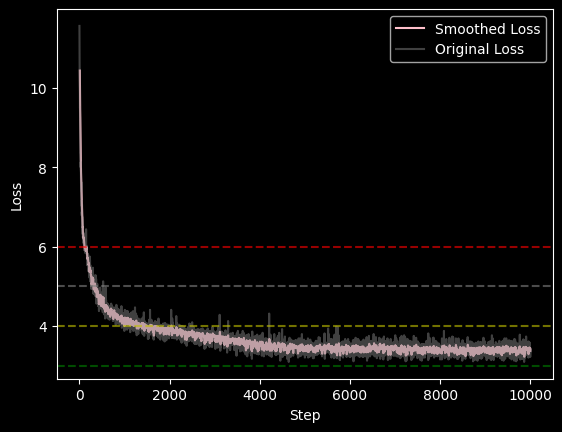

In [7]:
trainer.plot_loss(logging_file="logs_training_xlstm.csv")